In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/Team Drives/EE461P"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Blog NOTES.gdoc'		   Labels.xlsx
'CopyVarun of Student_Ed.ipynb'   "Natasha's Copy of Student_Ed.ipynb"
'Data Science Lab.ipynb'	   Student_Ed.ipynb
 hsls_09_school_v1_0.csv	  'x and y Columns.csv'
 hsls_16_student_v1_0.csv	  'X Data.csv'
 Imputed_and_target_stripped.csv  'y Data.csv'


In [2]:
!pip install mlxtend

In [0]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [0]:
student = pd.read_csv('/content/drive/Team Drives/EE461P/hsls_16_student_v1_0.csv')

array = []
for x in student.columns:
    if student[x][0] == -5:
        array.append(x)
        
student_no_null = student.drop(columns = array)

array = []
for x in student_no_null.columns:
    if x[0] == "W":
        array.append(x)
        
student_no_null_or_weight = student_no_null.drop(columns = array)


In [0]:
# data that has been processed i.e. removing -5s, W's, and other unusable data
X_and_y = pd.read_csv("/content/drive/Team Drives/EE461P/x and y Columns.csv")
X_and_y.head()

# split data
X = student_no_null_or_weight[X_and_y['X'].tolist()]
y = student_no_null_or_weight[X_and_y['y'].dropna().tolist()]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)


In [0]:
def RMSE_MLP(hidden_size):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    mlp = MLPRegressor(hidden_layer_sizes = (hidden_size,), activation = 'tanh', solver = 'sgd', 
                       learning_rate='constant', random_state=42, batch_size=30, learning_rate_init = 0.005)
    mlp.fit(scaled_X_train, y_train)
    y_pred = mlp.predict(X_test)
    
    print("For hidden layer size ", hidden_size, ", the average RMSE for the testing set is", 
          math.sqrt(mean_squared_error(y_pred, y_test)))

In [0]:
RMSE_MLP(100)

For hidden layer size  100 , the average RMSE for the testing set is 5.064296067529563


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:   25.6s finished

[2018-12-02 23:55:17] Features: 1/25 -- score: -8.57519338823326[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 579 out of 579 | elapsed:   28.0s finished

[2018-12-02 23:55:45] Features: 2/25 -- score: -4.496158829330561[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 578 out of 578 | elapsed:   44.5s finished

[2018-12-02 23:56:30] Features: 3/25 -- score: -4.2320748478628305[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 577 out of 577 | elapsed:   46.8s finished

[2018-12-02 23:57:17] Features: 4/25 -- score: -4.054282943494036[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:   5

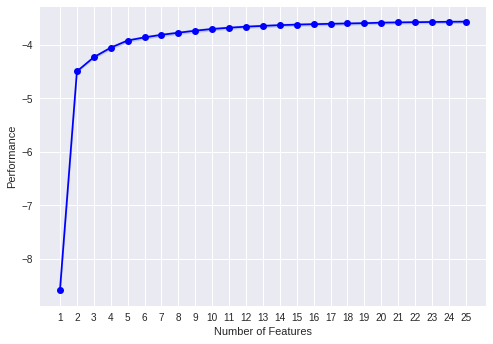

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

sfs1 = SFS(LinearRegression(),
          k_features=25,
          forward=True,
          floating=False,
          n_jobs=-1,
          verbose=2,
          scoring='neg_mean_squared_error',
          cv=3)

sfs1 = sfs1.fit(X, y)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_err')


In [0]:
import numpy as np
feature_name = list(X.columns.values)
sig_feat = np.array(feature_name)[list(sfs1.subsets_[7]['feature_idx'])]
print("The 3 most significant features for Backward Selection: ", sig_feat[0], ", ", sig_feat[1], ", ", sig_feat[2], sig_feat[3], ", ", sig_feat[4], ", ", sig_feat[5], ", ", sig_feat[6],".")

The 3 most significant features for Backward Selection:  X2TXMPROF5 ,  X3THIMATH ,  X3TCREDSCI X3TCREDAPART ,  X3TCREDLANG ,  X4HSCLGCRED ,  S4HSCRED .


In [0]:
sfs1.subsets_

{1: {'avg_score': -8.57519338823326,
  'cv_scores': array([-8.63511584, -8.61264283, -8.4778215 ]),
  'feature_idx': (96,),
  'feature_names': ('X4HSCLGCRED',)},
 2: {'avg_score': -4.496158829330561,
  'cv_scores': array([-4.50871091, -4.50908258, -4.47068299]),
  'feature_idx': (76, 96),
  'feature_names': ('X3TCREDSCI', 'X4HSCLGCRED')},
 3: {'avg_score': -4.2320748478628305,
  'cv_scores': array([-4.25524659, -4.25047732, -4.19050063]),
  'feature_idx': (76, 81, 96),
  'feature_names': ('X3TCREDSCI', 'X3TCREDAPART', 'X4HSCLGCRED')},
 4: {'avg_score': -4.054282943494036,
  'cv_scores': array([-4.08491861, -4.07916571, -3.99876451]),
  'feature_idx': (76, 81, 82, 96),
  'feature_names': ('X3TCREDSCI',
   'X3TCREDAPART',
   'X3TCREDLANG',
   'X4HSCLGCRED')},
 5: {'avg_score': -3.9200628073678043,
  'cv_scores': array([-3.94274595, -3.95077281, -3.86666966]),
  'feature_idx': (76, 81, 82, 96, 264),
  'feature_names': ('X3TCREDSCI',
   'X3TCREDAPART',
   'X3TCREDLANG',
   'X4HSCLGCRED',
 

In [0]:
# Using RFE for target = X3TGPAACAD

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


# Load the digits dataset
# split data
X = student_no_null_or_weight[X_and_y['X'].tolist()]

gpa_encoder = LabelEncoder()
y = gpa_encoder.fit_transform(student_no_null_or_weight['X3TGPAACAD'])


In [0]:
# scale data to be between -1 and 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

In [8]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (17627, 580) (17627,)
test (5876, 580) (5876,)


In [0]:
# find best cost to use
#parameters = {'C': np.arange(1, 5, 1).tolist()}
parameters = {'C': np.arange(1, 2, 1).tolist()}
svc = SVC(kernel='linear')
rbf = GridSearchCV(svc, parameters, cv=5)
rbf.fit(X_train, y_train)

y_pred = rbf.predict(X_test)
error = mean_squared_error(y_test, y_pred)

print("C parameter: ", C_range[rbf.best_index_])
print("Error rate: ", error)


In [0]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
#svc = svm.SVC(kernel="linear", C=C_range[rbf.best_index_])
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(digits.images[0].shape)
print(ranking)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()


In [5]:
student_no_null_or_weight.head()

,STU_ID,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,X4UNIV1,X1SEX,X1RACE,X1HISPANIC,X1WHITE,...,X4HS2PSMOS_IM,X4PSLFSTFB16_IM,X4ATNDCLG16FB_IM,X4EVRATNDCLG_IM,X4CHILDREN_IM,X4EMPHRSFB16_IM,X4INCOMECAT_IM,X4ANYJOB_IM,X4UNEMP16FB_IM,X4WORKING16FB_IM
0,10001,11,1,1,1111,11111,1,8,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,11,1,1,1111,11111,2,8,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10003,11,1,1,1111,11111,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,10,1,7,1001,10011,2,8,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10005,11,1,1,1111,11111,1,8,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_and_y.head(10)

,X,y
0,STU_ID,X3CLGANDWORK
1,X1SEX,X3TGPAENG
2,X1RACE,X3TGPAMAT
3,X1HISPANIC,X3TGPASCI
4,X1WHITE,X3TGPAHISCI
5,X1BLACK,X3TGPASOCST
6,X1DUALLANG,X3TGPAART
7,X1TXMTSCOR,X3TGPALANG
8,X1TXMPROF1,X3TGPAACAD
9,X1TXMPROF2,X3TAFGPATOT
